In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklift.metrics import uplift_at_k, uplift_auc_score, qini_auc_score, weighted_average_uplift, uplift_curve, qini_curve, average_squared_deviation
from sklift.viz import plot_uplift_preds, plot_qini_curve, plot_uplift_curve, plot_uplift_by_percentile
from sklift.models import SoloModel, TwoModels, ClassTransformation
import xgboost as xgb

In [16]:
df = pd.read_csv('c:/Users/sahil.kumar/Downloads/train.csv')
df.head()

,id,treatment_group,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_42,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,conversion
0,0,control,39.396577,-0.186548,19.524505,21.250208,55.291264,182.966712,-5.385606,144.573379,...,134.363458,-213.584582,-2.092461,-93.973258,-0.155597,-312.130733,44.798182,-125.682413,16.231365,0
1,1,control,38.987694,0.819522,-42.064512,-48.270949,-33.171257,179.459341,-87.151810,-162.693257,...,72.864779,559.783584,1.142391,80.037124,-1.216185,-111.473936,-127.737977,-117.501171,10.732234,0
2,2,treatment,-16.693093,1.844558,-8.615192,-18.818740,-22.271188,-116.290369,-63.816746,-38.340763,...,2.480242,96.998504,1.100962,-33.275159,0.920926,-679.492242,-91.009397,-18.173358,14.367636,0
3,3,treatment,-72.040154,-0.226921,39.802607,16.441262,-1.112509,68.128008,23.073147,4.688858,...,83.951551,-323.642557,-0.369182,93.221948,-1.962380,-442.466684,-22.298302,-75.916603,11.634299,0
4,4,treatment,18.296973,0.996437,24.465307,-34.151971,24.623458,-155.455558,-12.159787,26.705778,...,-208.531112,118.902324,-0.808578,-117.497906,1.770635,627.395611,122.019189,194.091195,-11.883858,0


In [17]:
df.columns

Index(['id', 'treatment_group', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6',
       'X_7', 'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'X_16', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24',
       'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33',
       'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42',
       'X_43', 'X_44', 'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50',
       'conversion'],
      dtype='object')

In [18]:
df['treatment_group'] = df['treatment_group'].apply(lambda x: 1 if x == 'treatment' else 0)
df.head()

,id,treatment_group,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_42,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,conversion
0,0,0,39.396577,-0.186548,19.524505,21.250208,55.291264,182.966712,-5.385606,144.573379,...,134.363458,-213.584582,-2.092461,-93.973258,-0.155597,-312.130733,44.798182,-125.682413,16.231365,0
1,1,0,38.987694,0.819522,-42.064512,-48.270949,-33.171257,179.459341,-87.151810,-162.693257,...,72.864779,559.783584,1.142391,80.037124,-1.216185,-111.473936,-127.737977,-117.501171,10.732234,0
2,2,1,-16.693093,1.844558,-8.615192,-18.818740,-22.271188,-116.290369,-63.816746,-38.340763,...,2.480242,96.998504,1.100962,-33.275159,0.920926,-679.492242,-91.009397,-18.173358,14.367636,0
3,3,1,-72.040154,-0.226921,39.802607,16.441262,-1.112509,68.128008,23.073147,4.688858,...,83.951551,-323.642557,-0.369182,93.221948,-1.962380,-442.466684,-22.298302,-75.916603,11.634299,0
4,4,1,18.296973,0.996437,24.465307,-34.151971,24.623458,-155.455558,-12.159787,26.705778,...,-208.531112,118.902324,-0.808578,-117.497906,1.770635,627.395611,122.019189,194.091195,-11.883858,0


In [19]:
df_train = df[:100000]
X = df_train.drop(columns={'id', 'treatment_group', 'conversion'})
treatment = df_train['treatment_group']
y = df_train['conversion']

In [20]:
df_train['treatment_group'].value_counts()

1    50333
0    49667
Name: treatment_group, dtype: int64

In [21]:
df_train['conversion'].value_counts()

0    79547
1    20453
Name: conversion, dtype: int64

In [22]:
X_train, X_test, treatment_train, treatment_test, y_train, y_test = train_test_split(X, 
                                                                                     treatment, 
                                                                                     y, 
                                                                                     test_size=0.3, 
                                                                                     stratify= df_train['treatment_group'])

## SoloModel using XGBoost

In [23]:
xgb_sm = xgb.XGBClassifier(random_state=42, n_estimators = 256, sampling_method='uniform',
                           objective='binary:logistic')
sm = SoloModel(estimator=xgb_sm)
sm.fit(X_train, y_train, treatment_train, estimator_fit_params={})

uplift_sm = sm.predict(X_test)

In [24]:
uplift_sm_df = pd.DataFrame(uplift_sm, columns=['pred_uplift'])

In [25]:
df_uplift = pd.concat([df, uplift_sm_df], axis=1)
df_uplift = df_uplift.sort_values(by='pred_uplift', ascending=False).reset_index(drop=True).drop(columns=['id'])
df_uplift.head()

,treatment_group,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,conversion,pred_uplift
0,0,54.291257,-0.540267,39.455541,44.676326,18.567630,296.414158,26.957108,90.375061,7.705142,...,149.440443,-0.208940,15.759786,-0.537964,215.795580,-81.618050,17.753409,-17.313240,0,0.818598
1,1,62.588502,-0.431061,-19.511097,25.431979,-37.946454,66.030613,65.896150,37.690761,-0.180647,...,278.178305,-1.956632,-107.150338,0.338481,-746.631278,-62.070587,-50.565311,-38.853821,0,0.814167
2,1,-40.992994,1.415266,-20.609627,-20.683807,51.943015,137.610564,-57.509648,-62.062716,-3.870218,...,121.779986,-1.584545,34.451197,-0.100149,219.322450,-59.944088,-34.705217,15.041249,0,0.810402
3,1,-33.748833,-0.367530,26.833810,2.111552,-32.930878,52.060188,50.592534,-37.919291,-44.472138,...,-173.323509,1.260148,69.334877,0.138460,25.150971,152.538197,40.860714,2.553024,1,0.783341
4,1,-108.708232,-1.157983,-17.993313,-12.262373,-0.075390,-0.797783,92.426816,-96.602382,-19.870991,...,-88.081257,-2.320781,53.788063,-0.073919,213.116075,45.306090,-30.219898,5.155811,0,0.777463


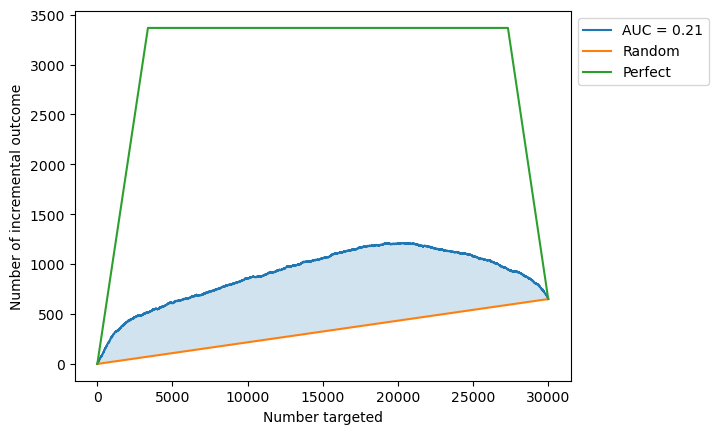

In [13]:
fig, ax = plt.subplots(1, 1)

plot_qini_curve(y_test, uplift_sm, treatment_test,
            ax = ax, perfect=True)

In [ ]:
X_test

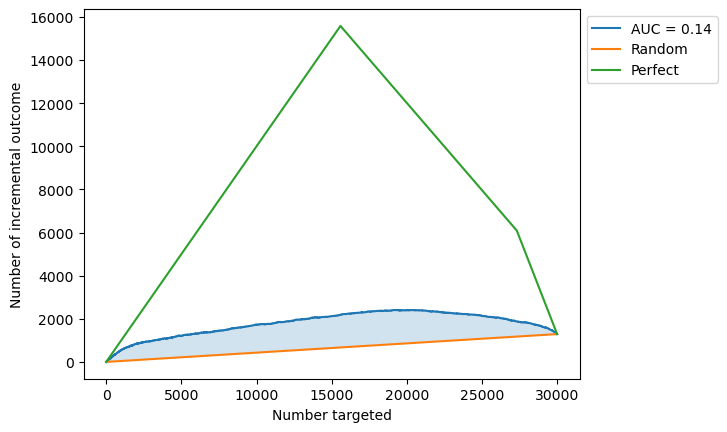

In [14]:
fig, ax1 = plt.subplots(1,1)

ax.set_title("Uplift Curve")
plot_uplift_curve(y_test, uplift_sm, treatment_test, 
                 ax = ax1)

C:\Users\sahil.kumar\AppData\Local\anaconda3\envs\uplift\lib\site-packages\numpy\core\fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


array([<Axes: title={'center': 'Uplift by percentile\nweighted average uplift = 0.0430'}>,
       <Axes: title={'center': 'Response rate by percentile'}, xlabel='Percentile'>],
      dtype=object)

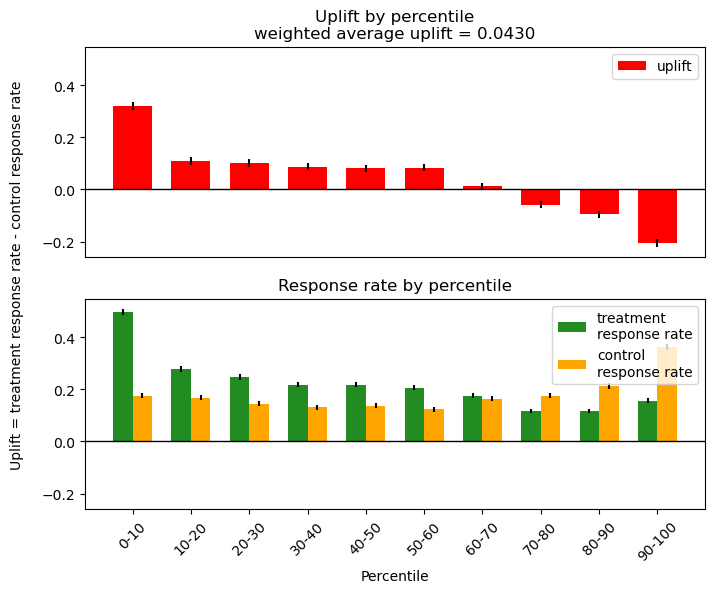

In [15]:
plot_uplift_by_percentile(y_test, uplift_sm, treatment_test, strategy='overall', kind='bar', string_percentiles=True)

# Class Transformation

In [46]:
from sklift.models import ClassTransformation, ClassTransformationReg
# booster = 'gbtree, gblinear or dart', sampling_method = ,eval_metric

xgb_ct = xgb.XGBClassifier(sampling_method = 'uniform', eval_metric = 'auc')
ct = ClassTransformation(estimator=xgb_ct)
ct.fit(X_train, y_train, treatment_train, estimator_fit_params={})

uplift_ct = ct.predict(X_test)

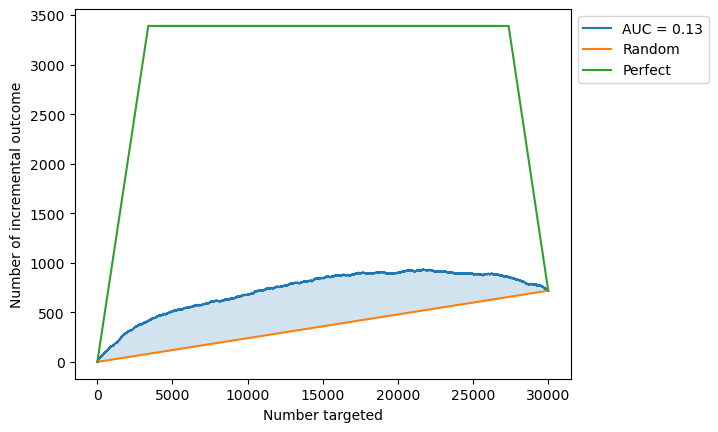

In [47]:
fig, ax2 = plt.subplots(1, 1)

plot_qini_curve(y_test, uplift_ct, treatment_test,
            ax = ax2, perfect=True)

C:\Users\sahil.kumar\AppData\Local\anaconda3\envs\uplift\lib\site-packages\numpy\core\fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


array([<Axes: title={'center': 'Uplift by percentile\nweighted average uplift = 0.0476'}>,
       <Axes: title={'center': 'Response rate by percentile'}, xlabel='Percentile'>],
      dtype=object)

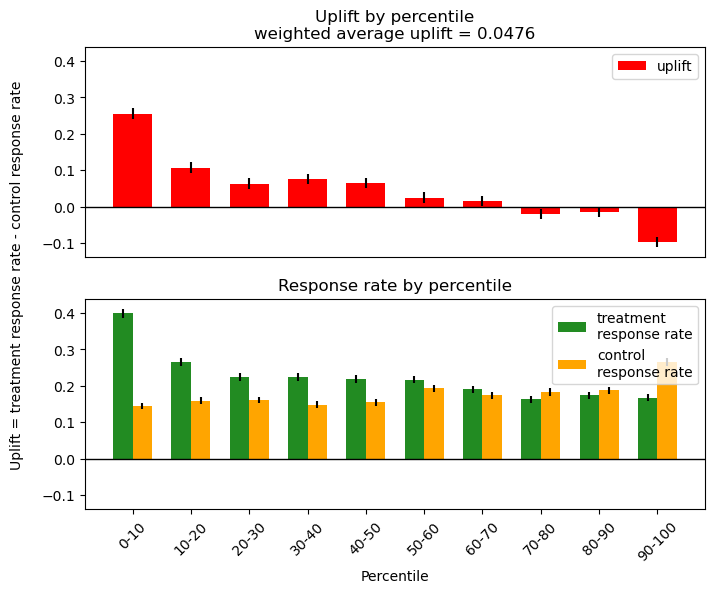

In [48]:
plot_uplift_by_percentile(y_test, uplift_ct, treatment_test, strategy='by_group', kind='bar', string_percentiles=True)

In [51]:
from sklift.metrics import uplift_curve
uplift_ct_curve_pt= uplift_curve(y_test, uplift_ct, treatment_test)

In [144]:
a1, a2 = uplift_ct_curve_pt
a1 = pd.DataFrame(a1, index=None, columns=['Number Targeted'])
a2 = pd.DataFrame(a2, index=None, columns=['Number of Incremental outcome'])
uplift_cruve_ct_df = pd.concat([a1, a2], axis=1)
uplift_cruve_ct_df.head(20)

,Number Targeted,Number of Incremental outcome
0,0,0.000000
1,1,0.000000
2,2,2.000000
3,3,3.000000
4,4,4.000000
5,5,5.000000
6,6,6.000000
7,7,5.250000
8,8,6.400000
9,9,7.500000


In [146]:
Negative_Uplift = []

for i in range(1, 29937):
    if uplift_cruve_ct_df.iloc[i-1, 1] <= uplift_cruve_ct_df.iloc[i, 1]:
        Negative_Uplift.append(0)
    else :
        Negative_Uplift.append(1)

In [147]:
Negative_Uplift

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,


In [148]:
uplift_cruve_ct_df.head()

,Number Targeted,Number of Incremental outcome
0,0,0.0
1,1,0.0
2,2,2.0
3,3,3.0
4,4,4.0


In [149]:
uplift_cruve_ct_df = pd.concat([uplift_cruve_ct_df, pd.DataFrame(Negative_Uplift)], axis=1)
uplift_cruve_ct_df.head()

,Number Targeted,Number of Incremental outcome,0
0,0,0.0,0.0
1,1,0.0,0.0
2,2,2.0,0.0
3,3,3.0,0.0
4,4,4.0,0.0


In [151]:
uplift_cruve_ct_df.rename(columns={0: 'Negative Uplift'}, inplace=True)
uplift_cruve_ct_df.head(5)

,Number Targeted,Number of Incremental outcome,Negative Uplift
0,0,0.0,0.0
1,1,0.0,0.0
2,2,2.0,0.0
3,3,3.0,0.0
4,4,4.0,0.0


In [157]:
import seaborn as sns

<Axes: xlabel='Number Targeted', ylabel='Number of Incremental outcome'>

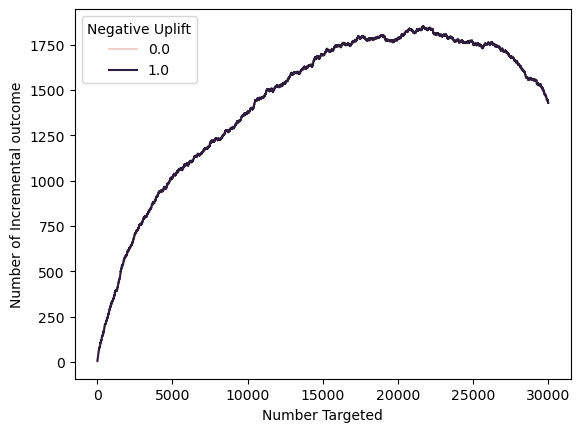

In [159]:
uplift_auc_score.plot(x = 'Number Targeted')